In [53]:
import glob
from tabulate import tabulate
from texttable import Texttable
import json
import latextable
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import latextable
import seaborn as sns

In [107]:
def read_json(path):
    validation = []
    with open(path, "r") as f:
        count = 0
        for line in f:
            line=line.strip().replace("'", '"')
            line = line.replace("nan", '100.0')
            count+=1
            if count % 2 == 0: #this is the remainder operator
                continue
#             ine = line.replace("nan", '"nan"')
            try:
                data = json.loads(line)
            except:
                print(line)
                raise
            if data['_meta']['type'] == 'test':
                validation.append({
                    "Round": data["Round"], 
                    "Accuracy (%)": data['top1'],
                    r"$\beta$": float(re.findall(".*momentum(.*)_bz.*",path)[0]),
                    "Agg": path.split("_")[7],
                    "Loss": data["Loss"],
                })
    return validation

                    
def transform(entry, atk, agg, m, s, d, b, bz):
    if "large" in atk:
        atk_name = r"IPM ($\epsilon = 100$)"
    elif atk == "IPM":
        atk_name = r"IPM ($\epsilon = 0.5$)"
    else:
        atk_name = atk
        
    if b == 0:
        atk_name = "No Attack"
        
    return {
        'Round Number': entry['E'],
        'Accuracy (%)': entry['top1'],
        'ATK': atk_name,
        "Batch Size": bz,
        'Setting': d.replace('f', 'F', 1),
        'AGG': fedavg_methods[agg]['name'],
        r"$\beta$": m,
        'seed': s,
        r"$M$" : b,
        r"$\delta=0$": False,
    }


In [114]:
root_dir = "/home/shenghui/blades/scripts/outputs/cifar10_fedsgd"
aggs = ['mean', 'krum', 'median', 'trimmedmean',  'centeredclipping', 'clustering', 'clippedclustering']
aggs = ['clustering', 'clippedclustering', 'mean', 'krum',  'geomed', 'autogm', 'median', 'trimmedmean',  'centeredclipping']
# aggs = ['clippedclustering', 'mean', 'krum',  'geomed', 'autogm', 'median', 'trimmedmean',  'centeredclipping']
agg_names = ['\\mean', '\\krum',  '\\gm', '\\autogm', '\\median', '\\tm', '\\cc', '\\clustering', '\\makecell{\\footnotesize \\ours \\\\ (ours)}']
# agg_names = ['\\mean', '\\krum',  '\\median', '\\tm', '\\cc', '\\clustering', '\\makecell{\\footnotesize \\ours \\\\ (ours)}']
atks = ["ipm", "signflipping", "labelflipping", "alie", "noise"] #* 2
atk_names = ["IPM", "SF", "LF", "ALIE", "Noise"] #* 2

history = []
for idx, agg in enumerate(aggs[:]):
    row = []
    print(agg)
    file_paths = glob.glob(f"{root_dir}/b5_*alie*_{agg}_*/stats")
    for file_path in file_paths:
        agg_validation = read_json(file_path)
        history.extend(agg_validation)

clustering
clippedclustering
mean
krum
geomed
autogm
median
trimmedmean
centeredclipping


In [115]:
data = pd.DataFrame(history)

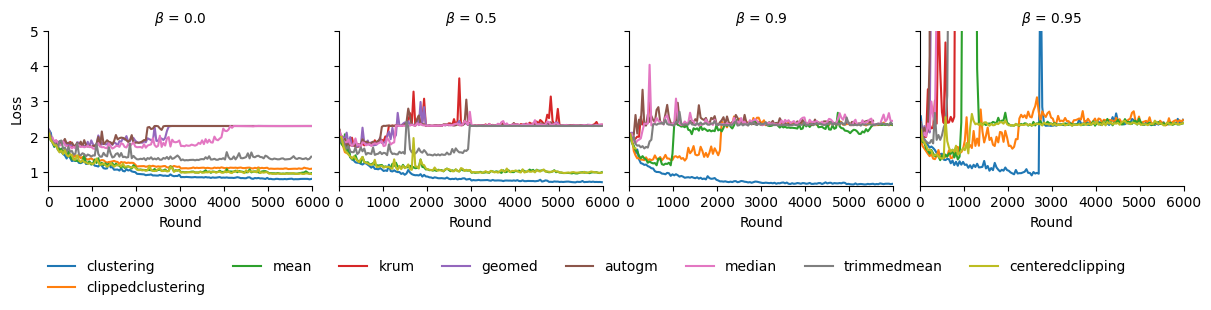

In [121]:
g = sns.relplot(
    data=data,
    x="Round", y="Loss", #y="Accuracy (%)",
    col=r"$\beta$", hue="Agg", style=r"Agg",
#     hue=r"$\beta$", col="Agg", style=r"$\beta$",
    height=2.5, aspect=1.25,
    # col_order=col_order,
    
    # markers=['o', 'x', 'o', 'x', 'o'],
    dashes=False,
#     markers=True,
    col_wrap=4,
    # linewidth=3.0,
    kind="line",
)
g.set(ylim=(0.6, 5))
g.set(xlim=(0, 6000))
sns.move_legend(g, "lower center", bbox_to_anchor=(.45, -0.25), ncol=8, title=None, frameon=False)